# EEG collection for epileptic seizure detection and classification using ML models



### evaluating and comparing baseline model(Logistic Regression) and advanced model (Neural network)

importing CSV file dataset as a dataframe.

In [2]:
import pandas as pd
df = pd.read_csv("BEED_Data.csv")
print(df.head())

    X1   X2   X3   X4   X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  \
0    4    7   18   25   28   27  20  10 -10  -18  -20  -16   13   32   12   
1   87  114  120  106   76   54  28   5 -19  -49  -85 -102 -100  -89  -61   
2 -131 -133 -140 -131 -123 -108 -58 -51 -70  -77  -76  -76  -73  -57  -40   
3   68  104   73   34  -12  -26 -38 -36 -67  -88  -25   31   18   -4    6   
4  -67  -90  -97  -94  -86  -71 -43 -11  23   46   58   50   39   19   -9   

   X16  y  
0   10  0  
1  -21  0  
2  -14  0  
3  -29  0  
4  -41  0  


dividing the dataset into features and label

In [3]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = "y")
y = df["y"]

further dividing the features and label into training and test dataset

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

*base-line model*: **Logistic Regression**

In [5]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)
y_pred_lgr = lgr_model.predict(x_test)
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63       422
           1       0.45      0.58      0.51       376
           2       0.40      0.34      0.37       418
           3       0.33      0.42      0.37       384

    accuracy                           0.46      1600
   macro avg       0.50      0.46      0.47      1600
weighted avg       0.50      0.46      0.47      1600



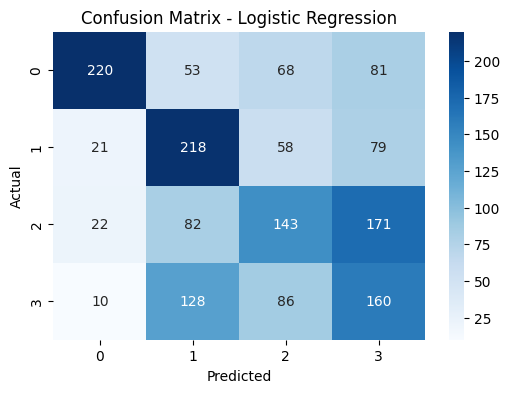

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lgr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_lgr)
print("Logistic Regression Accuracy:", acc)

Logistic Regression Accuracy: 0.463125


*best performing model*: **Neural Network**

In [8]:
import tensorflow as tf

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.PReLU(), #learns slope itself

    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.LeakyReLU(negative_slope=0.01)
    tf.keras.layers.PReLU(),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    # tf.keras.layers.LeakyReLU(negative_slope=0.01),
    # tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    # tf.keras.layers.LeakyReLU(negative_slope=0.01),
    # tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.PReLU(),
    # tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(8, kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(4, activation='softmax'),
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0, callbacks=[early_stop])

In [103]:
import numpy as np
y_pred_probab = nn_model.predict(x_test)
y_pred_nn = np.argmax(y_pred_probab, axis=1)
print(classification_report(y_pred_nn, y_test))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.94      0.99      0.96       354
           2       0.96      0.96      0.96       421
           3       0.97      0.93      0.95       403

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



Text(0.5, 1.0, 'Loss Curve')

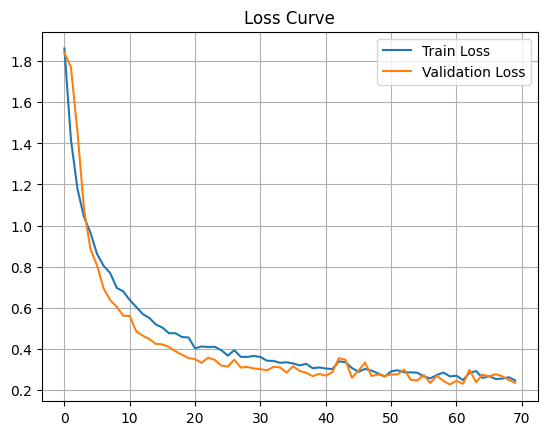

In [104]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.grid(); plt.title('Loss Curve')

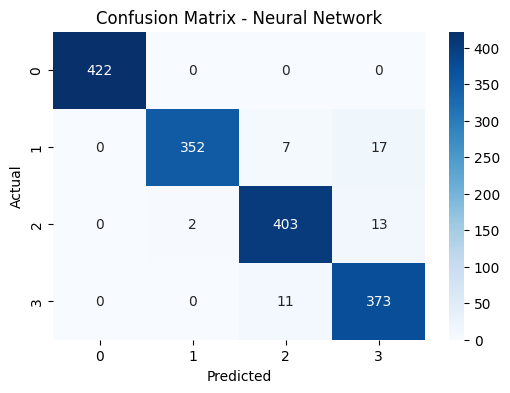

In [105]:
c = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6,4))
sns.heatmap(c, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()

In [106]:
acc = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", acc)

Neural Network Accuracy: 0.96875
